### 安装和导入必要的库

In [1]:
# Cell 1: 解决中文显示问题和导入库
import os
import glob
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
import torchvision.transforms as transforms
from collections import defaultdict

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans', 'Arial Unicode MS', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 如果上面的字体都不可用，使用英文标题
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# 设置随机种子
random.seed(42)
np.random.seed(42)

### 数据集路径设置

In [2]:
train_data_path = "./ml2022spring-hw15/Omniglot/Omniglot/images_background/"
test_data_path = "./ml2022spring-hw15/Omniglot-test/Omniglot-test/"

print("检查数据集路径...")
print(f"训练集路径存在: {os.path.exists(train_data_path)}")
print(f"测试集路径存在: {os.path.exists(test_data_path)}")

检查数据集路径...
训练集路径存在: True
测试集路径存在: True


### 获取训练集中的语言信息


找到 30 种语言:
1. Alphabet_of_the_Magi.0 (20 个字符)
2. Anglo-Saxon_Futhorc.0 (29 个字符)
3. Arcadian.0 (26 个字符)
4. Armenian.0 (41 个字符)
5. Asomtavruli_(Georgian).0 (40 个字符)
6. Balinese.0 (24 个字符)
7. Bengali.0 (46 个字符)
8. Blackfoot_(Canadian_Aboriginal_Syllabics).0 (14 个字符)
9. Braille.0 (26 个字符)
10. Burmese_(Myanmar).0 (34 个字符)
11. Cyrillic.0 (33 个字符)
12. Early_Aramaic.0 (22 个字符)
13. Futurama.0 (26 个字符)
14. Grantha.0 (43 个字符)
15. Greek.0 (24 个字符)
16. Gujarati.0 (48 个字符)
17. Hebrew.0 (22 个字符)
18. Inuktitut_(Canadian_Aboriginal_Syllabics).0 (16 个字符)
19. Japanese_(hiragana).0 (52 个字符)
20. Japanese_(katakana).0 (47 个字符)
21. Korean.0 (40 个字符)
22. Latin.0 (26 个字符)
23. Malay_(Jawi_-_Arabic).0 (40 个字符)
24. Mkhedruli_(Georgian).0 (41 个字符)
25. N_Ko.0 (33 个字符)
26. Ojibwe_(Canadian_Aboriginal_Syllabics).0 (14 个字符)
27. Sanskrit.0 (42 个字符)
28. Syriac_(Estrangelo).0 (23 个字符)
29. Tagalog.0 (17 个字符)
30. Tifinagh.0 (55 个字符)


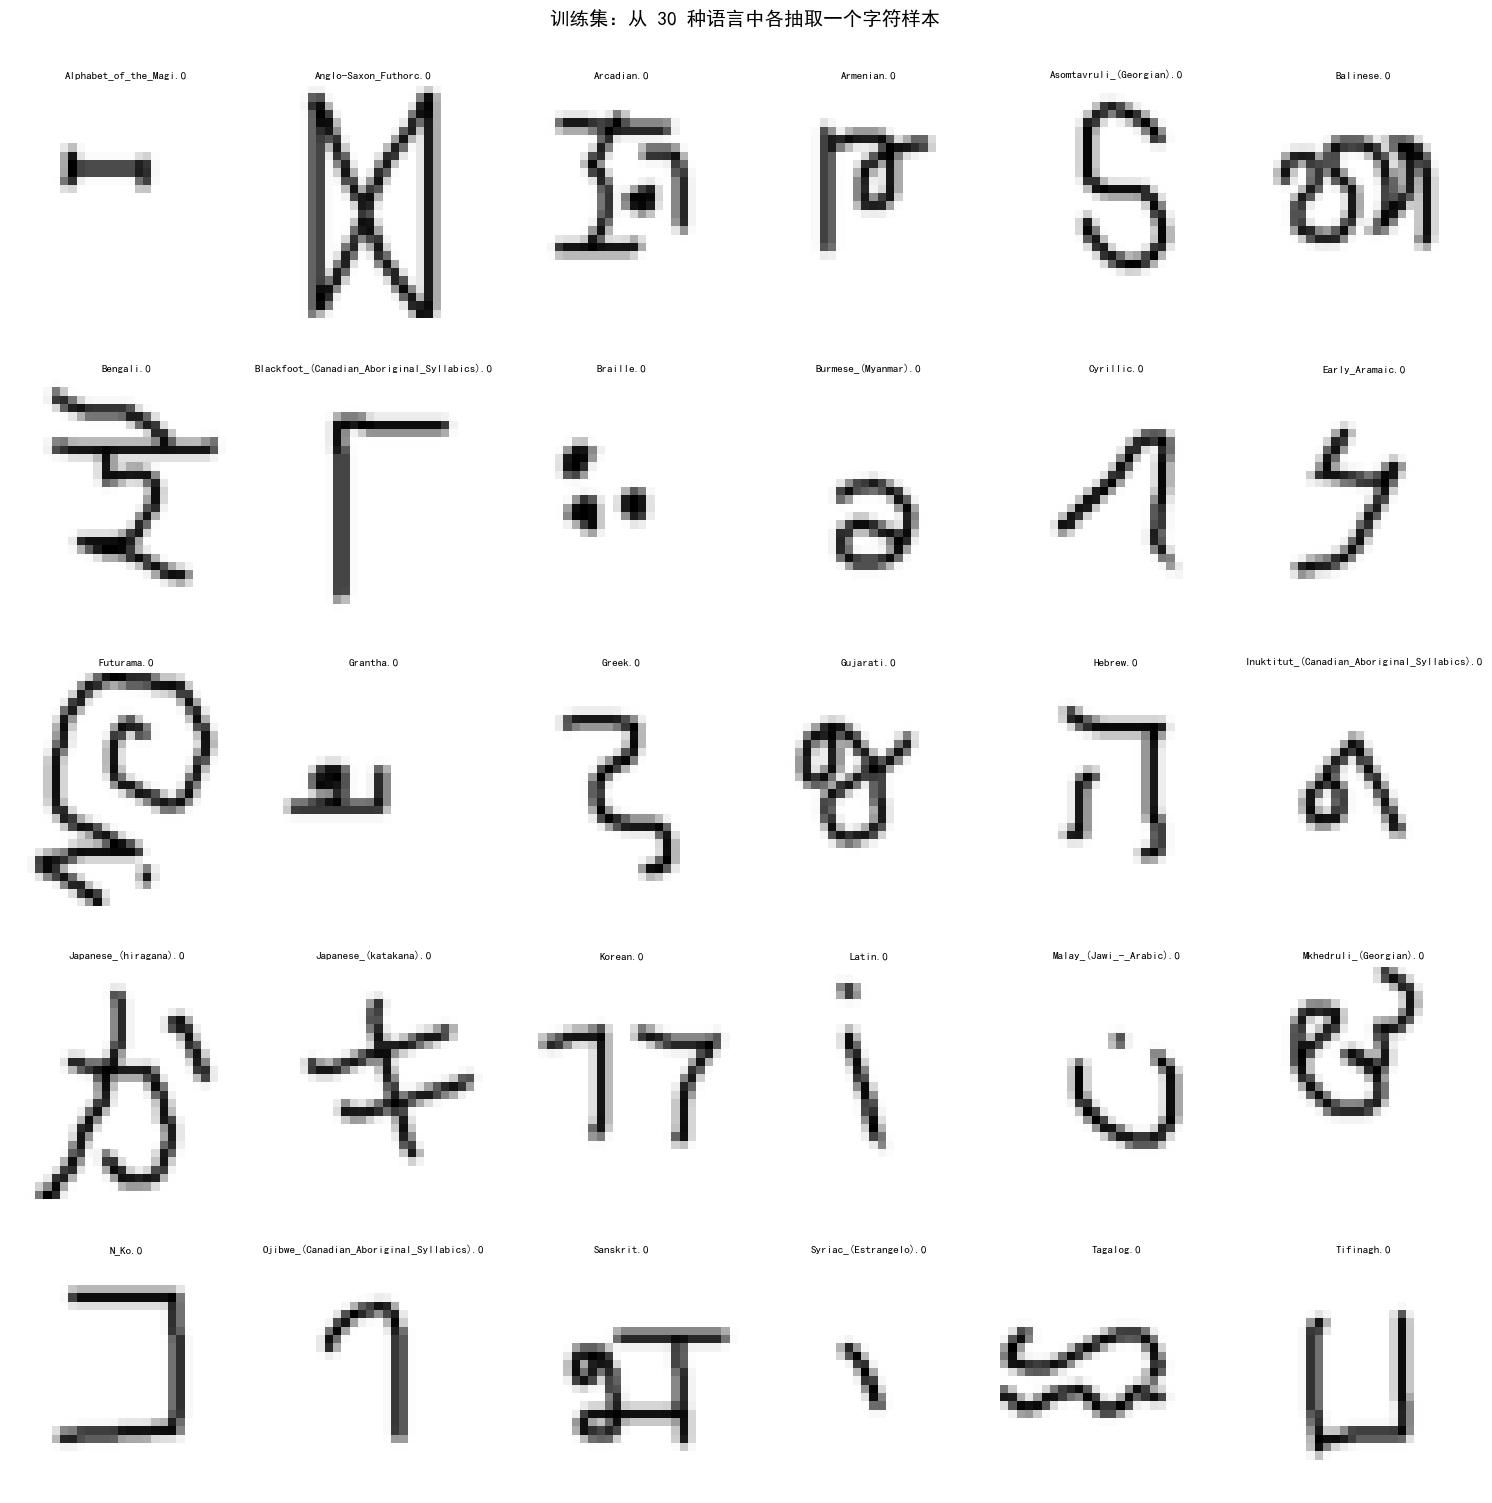

In [3]:
def get_languages_and_characters(data_path):
    """获取所有语言及其字符信息"""
    languages = {}
    
    # 遍历所有语言文件夹
    for lang_path in glob.glob(os.path.join(data_path, "*")):
        if os.path.isdir(lang_path):
            lang_name = os.path.basename(lang_path)
            characters = []
            
            # 遍历该语言下的所有字符文件夹
            for char_path in glob.glob(os.path.join(lang_path, "character*")):
                if os.path.isdir(char_path):
                    characters.append(char_path)
            
            languages[lang_name] = characters
    
    return languages

languages_info = get_languages_and_characters(train_data_path)
print(f"\n找到 {len(languages_info)} 种语言:")
for i, lang in enumerate(languages_info.keys()):
    print(f"{i+1}. {lang} ({len(languages_info[lang])} 个字符)")

# Cell 4: 从每种语言抽取一个字符样本进行可视化
def visualize_languages_samples(languages_info, max_languages=30):
    """从每种语言中抽取一个字符样本进行可视化"""
    
    # 限制显示的语言数量
    selected_languages = list(languages_info.keys())[:max_languages]
    
    # 计算子图布局
    cols = 6
    rows = (len(selected_languages) + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    transform = transforms.Compose([transforms.ToTensor()])
    
    for idx, lang_name in enumerate(selected_languages):
        row = idx // cols
        col = idx % cols
        
        # 随机选择该语言的一个字符
        characters = languages_info[lang_name]
        if characters:
            selected_char = random.choice(characters)
            
            # 获取该字符的所有图片
            img_files = glob.glob(os.path.join(selected_char, "*.png"))
            if img_files:
                # 随机选择一张图片
                selected_img = random.choice(img_files)
                
                # 加载和显示图片
                img = Image.open(selected_img)
                axes[row, col].imshow(img, cmap='gray')
                axes[row, col].set_title(f"{lang_name}", fontsize=8)
                axes[row, col].axis('off')
    
    # 隐藏多余的子图
    for idx in range(len(selected_languages), rows * cols):
        row = idx // cols
        col = idx % cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.suptitle(f"训练集：从 {len(selected_languages)} 种语言中各抽取一个字符样本", 
                 fontsize=14, y=1.02)
    plt.show()

# 可视化语言样本
visualize_languages_samples(languages_info, max_languages=30)

### 从每种语言抽取一个字符样本进行可视化

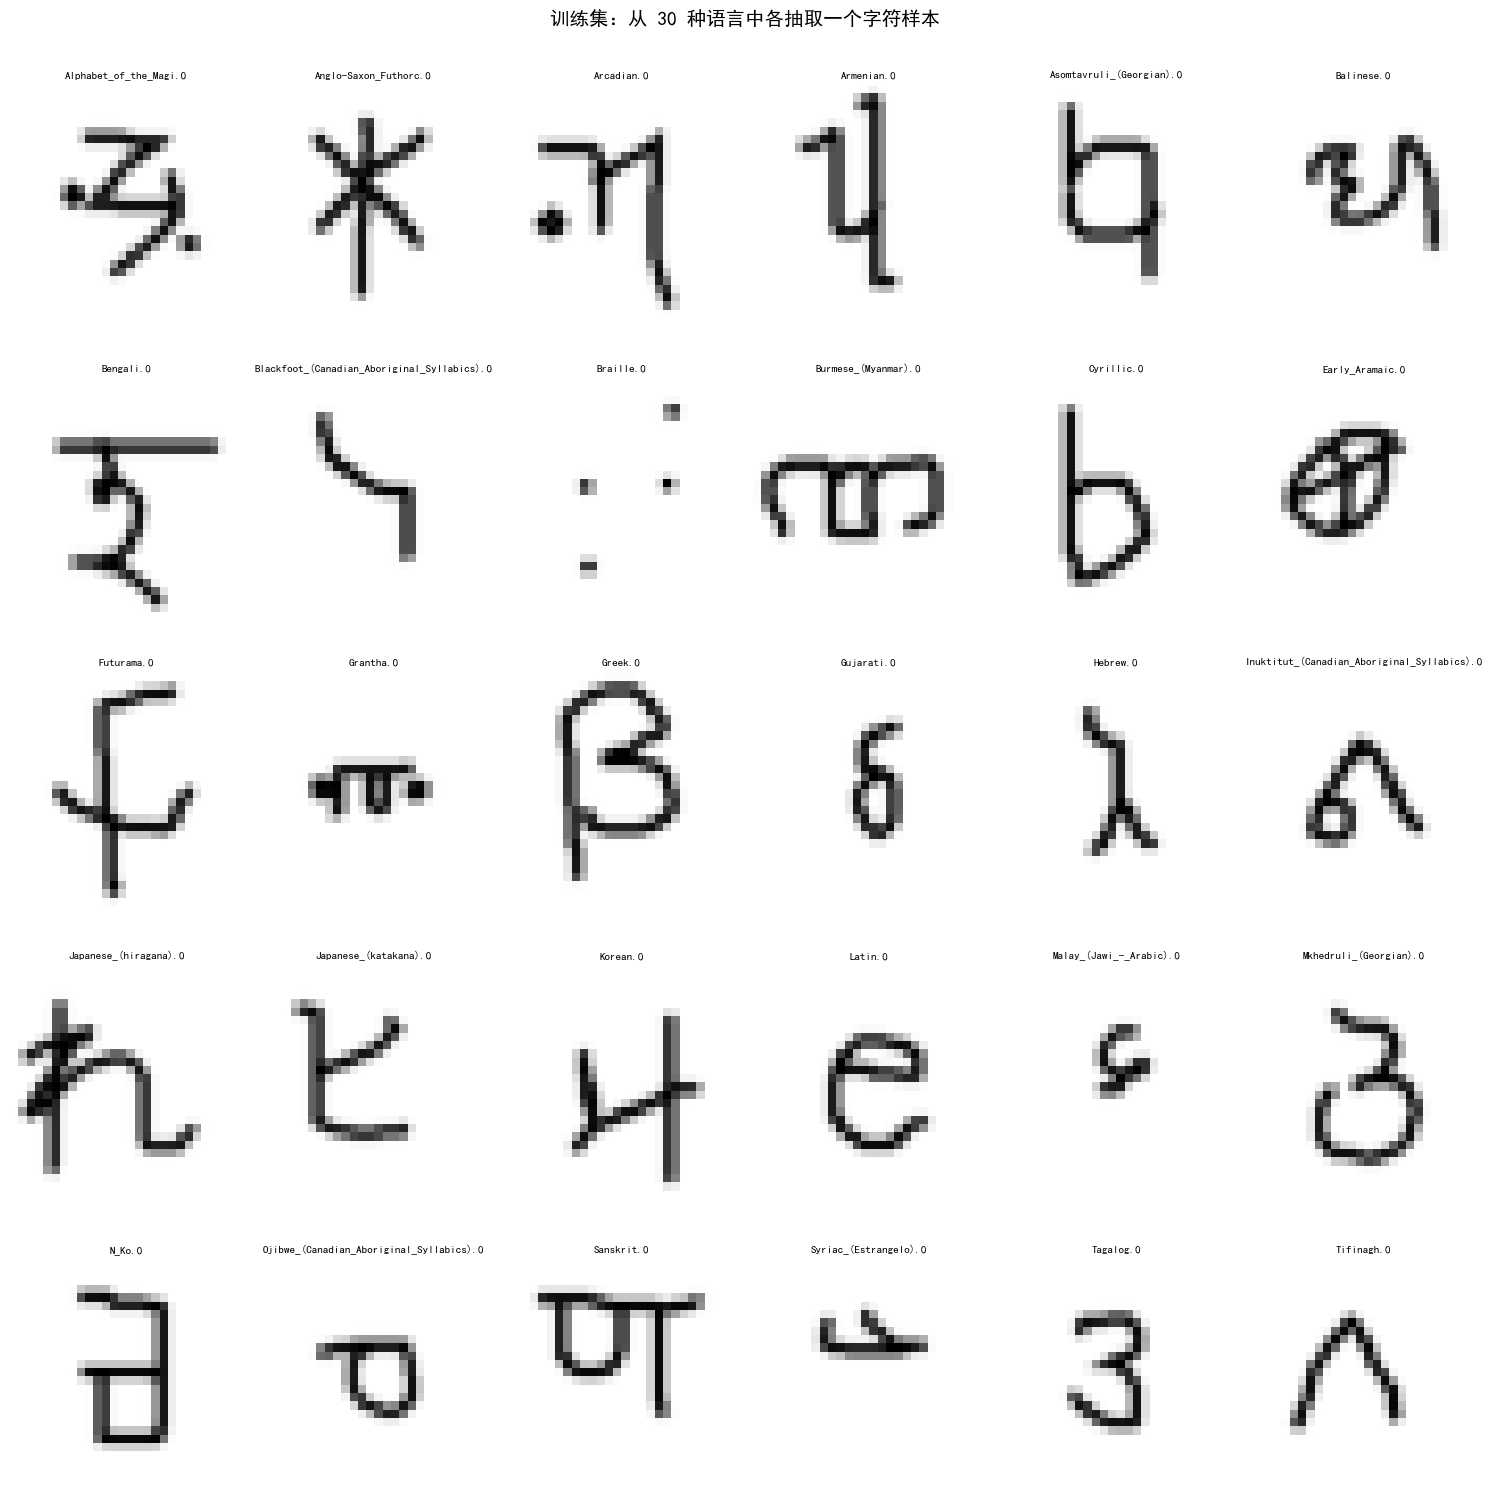

In [4]:
def visualize_languages_samples(languages_info, max_languages=30):
    """从每种语言中抽取一个字符样本进行可视化"""
    
    # 限制显示的语言数量
    selected_languages = list(languages_info.keys())[:max_languages]
    
    # 计算子图布局
    cols = 6
    rows = (len(selected_languages) + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    transform = transforms.Compose([transforms.ToTensor()])
    
    for idx, lang_name in enumerate(selected_languages):
        row = idx // cols
        col = idx % cols
        
        # 随机选择该语言的一个字符
        characters = languages_info[lang_name]
        if characters:
            selected_char = random.choice(characters)
            
            # 获取该字符的所有图片
            img_files = glob.glob(os.path.join(selected_char, "*.png"))
            if img_files:
                # 随机选择一张图片
                selected_img = random.choice(img_files)
                
                # 加载和显示图片
                img = Image.open(selected_img)
                axes[row, col].imshow(img, cmap='gray')
                axes[row, col].set_title(f"{lang_name}", fontsize=8)
                axes[row, col].axis('off')
    
    # 隐藏多余的子图
    for idx in range(len(selected_languages), rows * cols):
        row = idx // cols
        col = idx % cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.suptitle(f"训练集：从 {len(selected_languages)} 种语言中各抽取一个字符样本", 
                 fontsize=14, y=1.02)
    plt.show()

# 可视化语言样本
visualize_languages_samples(languages_info, max_languages=30)


### 测试集可视化函数

In [5]:
def visualize_test_samples(test_data_path, num_samples=3):
    """可视化测试集的support和query样本"""
    
    support_path = os.path.join(test_data_path, "support")
    query_path = os.path.join(test_data_path, "query")
    
    if not (os.path.exists(support_path) and os.path.exists(query_path)):
        print("测试集support或query文件夹不存在！")
        return
    
    # 获取所有测试任务ID
    task_ids = sorted([d for d in os.listdir(support_path) 
                      if os.path.isdir(os.path.join(support_path, d))])
    
    print(f"测试集中共有 {len(task_ids)} 个任务")
    
    # 随机选择几个任务进行可视化
    selected_tasks = random.sample(task_ids, min(num_samples, len(task_ids)))
    
    for task_idx, task_id in enumerate(selected_tasks):
        print(f"\n任务 {task_id}:")
        
        fig, axes = plt.subplots(2, 5, figsize=(12, 6))
        
        # 显示support set (上排)
        support_task_path = os.path.join(support_path, task_id)
        support_images = sorted([f for f in os.listdir(support_task_path) 
                               if f.endswith('.png')])
        
        for i, img_name in enumerate(support_images[:5]):
            img_path = os.path.join(support_task_path, img_name)
            img = Image.open(img_path)
            axes[0, i].imshow(img, cmap='gray')
            axes[0, i].set_title(f"Support {i}", fontsize=10)
            axes[0, i].axis('off')
        
        # 显示query set (下排)
        query_task_path = os.path.join(query_path, task_id)
        query_images = sorted([f for f in os.listdir(query_task_path) 
                             if f.endswith('.png')])
        
        for i, img_name in enumerate(query_images[:5]):
            img_path = os.path.join(query_task_path, img_name)
            img = Image.open(img_path)
            axes[1, i].imshow(img, cmap='gray')
            axes[1, i].set_title(f"Query {i}", fontsize=10)
            axes[1, i].axis('off')
        
        plt.suptitle(f"测试任务 {task_id}: Support Set (上) vs Query Set (下)", 
                     fontsize=14)
        plt.tight_layout()
        plt.show()


### 可视化测试集样本

测试集中共有 640 个任务

任务 0163:


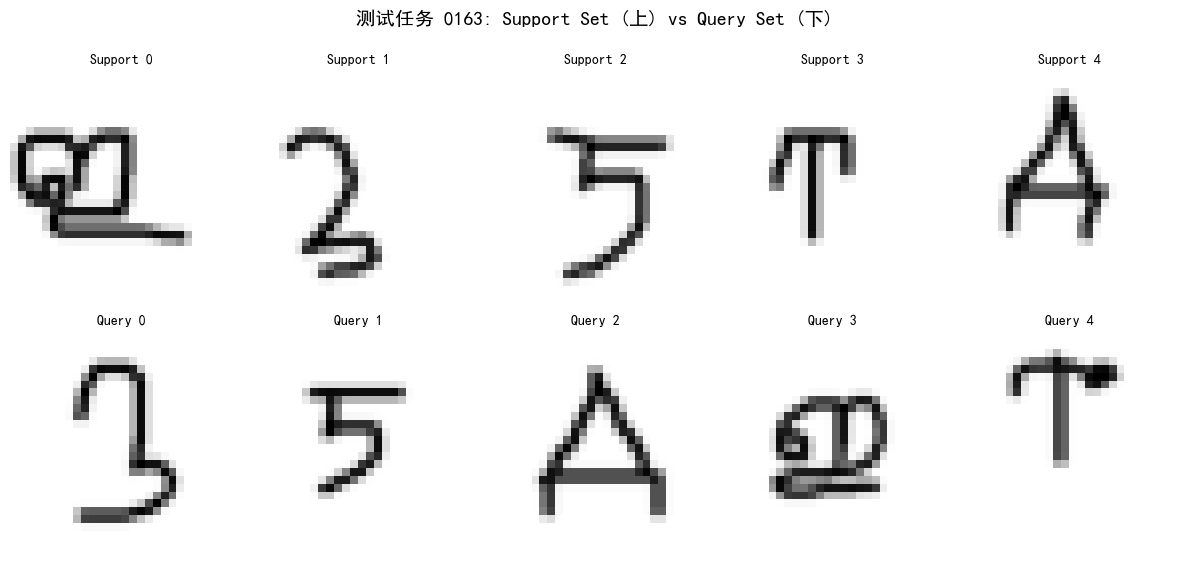


任务 0432:


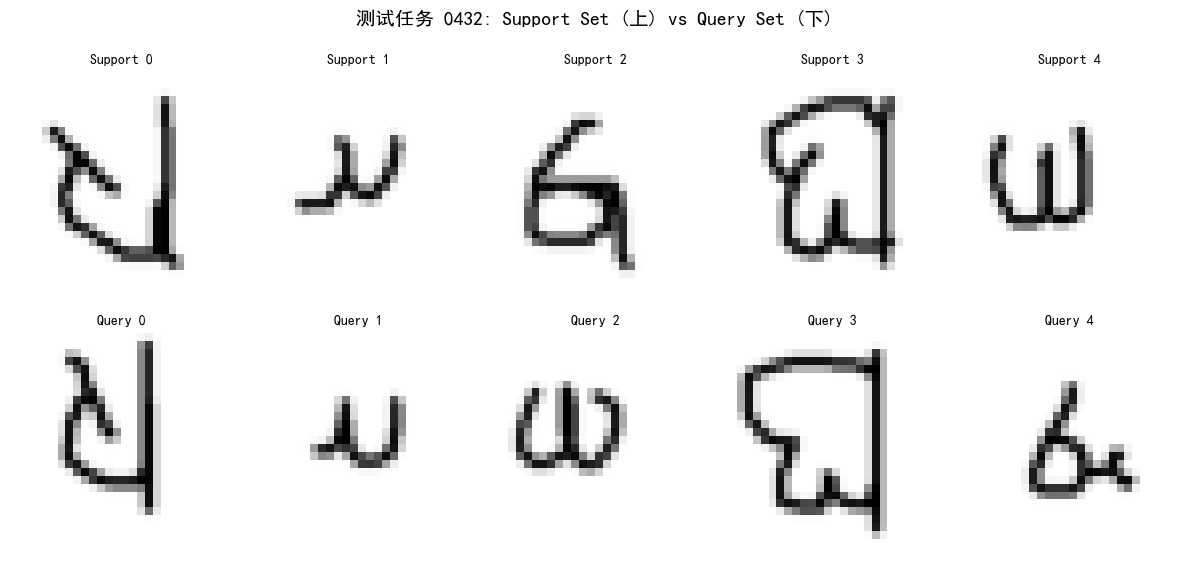


任务 0610:


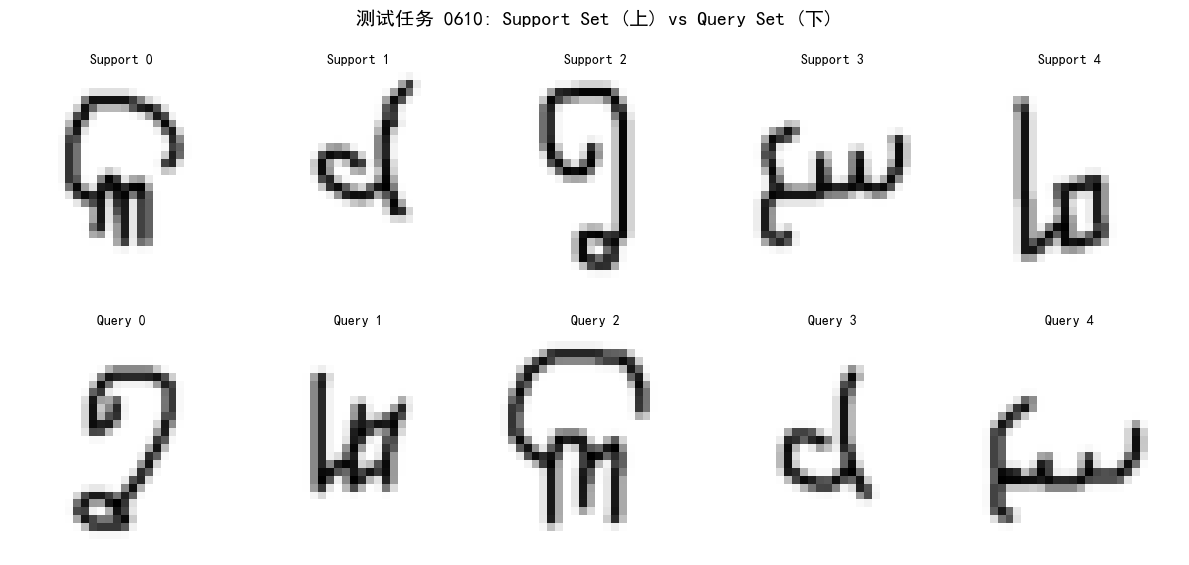

In [6]:
visualize_test_samples(test_data_path, num_samples=3)

### 数据集统计信息

In [7]:
def print_dataset_statistics(train_path, test_path):
    """打印数据集的统计信息"""
    print("=" * 50)
    print("OMNIGLOT 数据集统计信息")
    print("=" * 50)
    
    # 训练集统计
    languages_info = get_languages_and_characters(train_path)
    total_chars = sum(len(chars) for chars in languages_info.values())
    
    print(f"\n📚 训练集 (images_background):")
    print(f"  - 语言数量: {len(languages_info)}")
    print(f"  - 字符总数: {total_chars}")
    
    # 计算每个字符的图片数量（假设每个字符20张图片）
    sample_char = list(languages_info.values())[0][0] if languages_info else None
    if sample_char:
        sample_imgs = len(glob.glob(os.path.join(sample_char, "*.png")))
        print(f"  - 每个字符图片数: {sample_imgs}")
        print(f"  - 总图片数: 约 {total_chars * sample_imgs}")
    
    # 测试集统计
    support_path = os.path.join(test_path, "support")
    if os.path.exists(support_path):
        test_tasks = len([d for d in os.listdir(support_path) 
                         if os.path.isdir(os.path.join(support_path, d))])
        print(f"\n🔍 测试集 (Omniglot-test):")
        print(f"  - 测试任务数: {test_tasks}")
        print(f"  - 每个任务: 5-way classification")
        print(f"  - Support set: 每类1张图片")
        print(f"  - Query set: 每类1张图片")

print_dataset_statistics(train_data_path, test_data_path)

OMNIGLOT 数据集统计信息

📚 训练集 (images_background):
  - 语言数量: 30
  - 字符总数: 964
  - 每个字符图片数: 20
  - 总图片数: 约 19280

🔍 测试集 (Omniglot-test):
  - 测试任务数: 640
  - 每个任务: 5-way classification
  - Support set: 每类1张图片
  - Query set: 每类1张图片


### 创建一个交互式的字符查看器

In [8]:
def interactive_character_viewer(languages_info, language_name=None):
    """交互式查看特定语言的所有字符"""
    
    if language_name is None:
        print("可用的语言:")
        for i, lang in enumerate(languages_info.keys()):
            print(f"{i+1}. {lang}")
        return
    
    if language_name not in languages_info:
        print(f"语言 '{language_name}' 不存在！")
        return
    
    characters = languages_info[language_name]
    print(f"\n显示语言 '{language_name}' 的所有字符 (共 {len(characters)} 个):")
    
    # 计算布局
    cols = 8
    rows = (len(characters) + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(16, 2*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    for idx, char_path in enumerate(characters):
        row = idx // cols
        col = idx % cols
        
        # 获取该字符的第一张图片
        img_files = glob.glob(os.path.join(char_path, "*.png"))
        if img_files:
            img = Image.open(img_files[0])
            axes[row, col].imshow(img, cmap='gray')
            char_name = os.path.basename(char_path)
            axes[row, col].set_title(char_name, fontsize=8)
            axes[row, col].axis('off')
    
    # 隐藏多余的子图
    for idx in range(len(characters), rows * cols):
        row = idx // cols
        col = idx % cols
        axes[row, col].axis('off')
    
    plt.suptitle(f"语言: {language_name} (所有字符)", fontsize=14)
    plt.tight_layout()
    plt.show()

### 示例：查看某个特定语言的所有字符
### 取第一个语言作为示例


示例：查看语言 'Japanese_(hiragana).0' 的所有字符

显示语言 'Japanese_(hiragana).0' 的所有字符 (共 52 个):


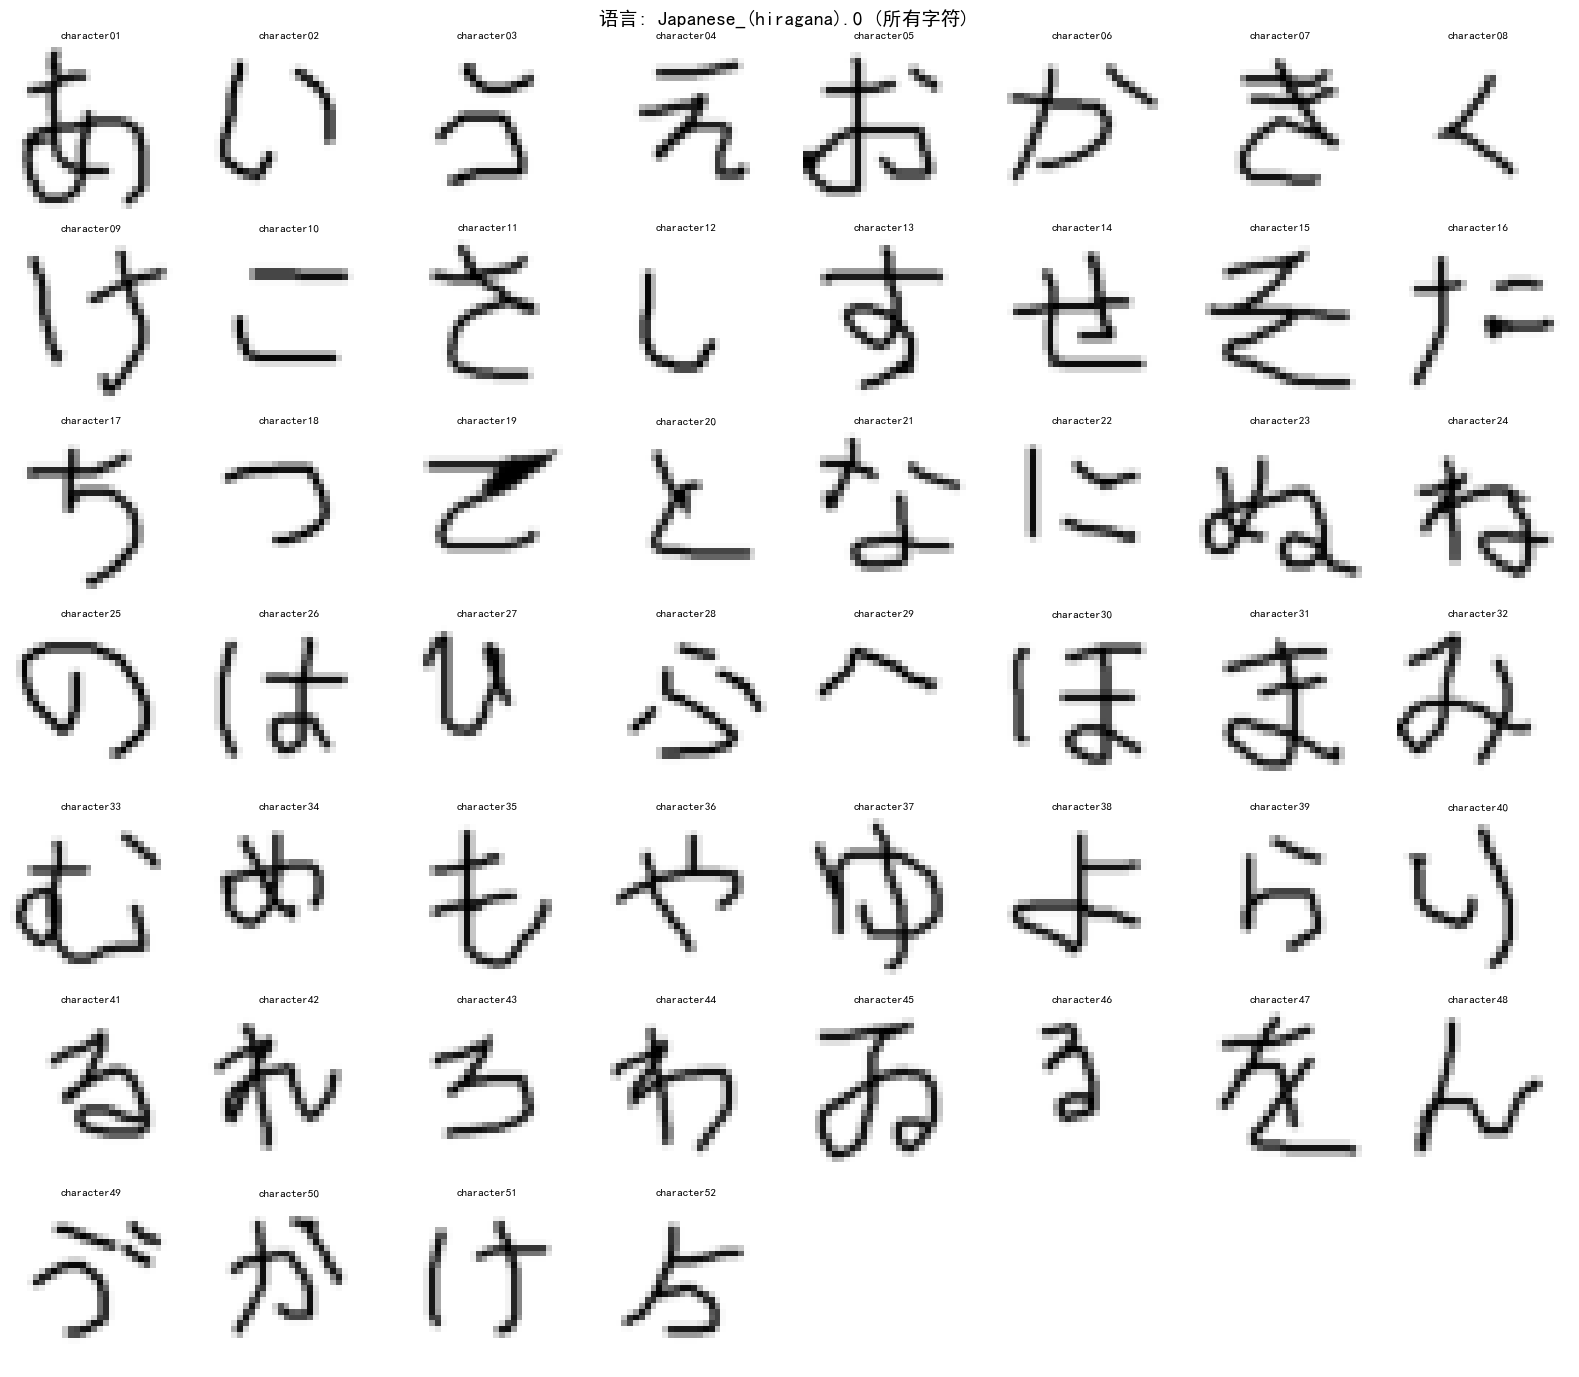

In [11]:
if languages_info:
    first_language = list(languages_info.keys())[18]
    print(f"\n示例：查看语言 '{first_language}' 的所有字符")
    interactive_character_viewer(languages_info, first_language)